# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** - получить ответы на вопросы заказчика:
* Есть ли зависимость между наличием детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок

**Ход исследования**:
1. Обзор данных
2. Предобработка данных
3. Получение ответов на вопросы заказчика

**Используемые библиотеки**:
1. pandas
2. pymystem3
3. collections

## Обзор данных

В самом начале работы над проектом необходимо подключить библиотеки, которые будут использоваться в ходе выполнения проекта.

In [1]:
import pandas as pd
from pymystem3 import Mystem #библиотека для лемматизации
from collections import Counter #библиотека для подсчёта значений в данных типа list

Для начала исследования необходимо импортировать данные. Для этого будет использована функция `read_csv()` библиотеки **Pandas**

In [2]:
data = pd.read_csv('/datasets/data.csv') #чтение данных из файла

Далее необходимо получить общее представление о данных. Для этого используем методы `head()`, `info()`, `describe()`:

In [3]:
display(data.head(10))
print(data.info())
display(data.describe()) #метод describe позволяет получить базовые статистические данные

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


В таблице 12 стобцов с различными типами данных. Согласно документации к набору данных:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

Первый взгляд на данные позволяет выявить очевидные проблемы, которые необходимо устранить на этапе предобработки:

1. В данных имеются пропуски, которые необходимо обработать.
2. Данные имеют аномальные значения, которые необходимо обработать (например, максимальное значение трудового стажа равно 401755 дней, что соответствует примерно 1100 годам, или отрицательные значения трудового стажа).
3. Данные имеют отрицательные значения там, где их быть не должно.
3. Типы данных в некоторых столбцах не соответствуют их смысловой интерпретации, что не является принципиальной ошибкой (иначе говоря, тип данных не влияет на конечный результат исследования), однако, необходимо их скорректировать для некоторых столбцов для последующего более удобного взаимодействия с ними.
4. Не все категориальные переменные имеют единый регистр написания, что может затруднить дальнейшую категоризацию, если она потребуется

Далее необходимо проверить все уникальные значения с помощью метода `unique()` в текстовых ячейках, которые могут использоваться для дальнейшей категоризации данных (это необходимо для выявления неочевидных аномалий в данных):

In [4]:
print('Уникальные значения в столбце children:')
print(data['children'].unique())

Уникальные значения в столбце children:
[ 1  0  3  2 -1  4 20  5]


Очевидно, что отрицательного значения в колонке 'children' быть не должно (так как количество детей может быть только >= 0). Необходимо будет проверить количество таких артефактов и обработать. Также в столбце children присутствует значение "20". Маловероятно, что данное значение подразумевает количество детей в точности равное двадцати, вероятнее всего, по смыслу данное значение подразумевает "количество детей > 5". Обработка не требуется.

In [5]:
print('Уникальные значения в столбце dob_years:')
print(sorted(data['dob_years'].unique())) #дополнительно отсортируем данные

Уникальные значения в столбце dob_years:
[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


Обнаружено аномальное значение "0" (теоретически, данное значение не является аномальным в общем понимании смысла полных лет, однако в данной задаче это является аномалией, так как взаимодействовать с кредитной организацией можно лишь по достижении определенного возраста). Его необходимо обработать.

In [6]:
print('Уникальные значения в столбце education:')
print(data['education'].unique())

Уникальные значения в столбце education:
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


Очевидно, что данный столбец необходимо полностью перевести в нижний регистр, так как в противном случае одинаковые категории будут распознаваться как разные.

In [7]:
print('Уникальные значения в столбце education_id:')
print(data['education_id'].unique())

Уникальные значения в столбце education_id:
[0 1 2 3 4]


Здесь с данными всё в порядке.

In [8]:
print('Уникальные значения в столбце family_status:')
print(data['family_status'].unique())

Уникальные значения в столбце family_status:
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']


Здесь с данными всё в порядке.

In [9]:
print('Уникальные значения в столбце family_status_id:')
print(data['family_status_id'].unique())

Уникальные значения в столбце family_status_id:
[0 1 2 3 4]


Здесь с данными всё в порядке (количество id соответствует количеству "семейных положений").

In [10]:
print('Уникальные значения в столбце gender:')
print(data['gender'].unique())

Уникальные значения в столбце gender:
['F' 'M' 'XNA']


В данном столбце есть значение, которое, очевидно, соответствует тому, что пол не был указан при заполнении данных, или был указан некорректно, или "потерялся" в ходе технических. Обработка не требуется, так как эти данные не влияют на результат исследования.

In [11]:
print('Уникальные значения в столбце income_type:')
print(data['income_type'].unique())

Уникальные значения в столбце income_type:
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']


Здесь с данными всё в порядке

In [12]:
print('Уникальные значения в столбце debt:')
print(data['debt'].unique())

Уникальные значения в столбце debt:
[0 1]


Здесь с данными всё в порядке. 1 - были задолженности, 0 - задолженности отсутствуют.

In [13]:
print('Уникальные значения в столбце purpose:')
print(data['purpose'].unique())

Уникальные значения в столбце purpose:
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образ

С данными всё в порядке, однако, в дальнейшем потребуется лемматизация, так как обрабатывать вручную такой набор данных представляется затруднительным.

**Вывод**

После первичного знакомства с данными можно сделать вывод, что представленных данных достаточно для ответа на поставленные вопросы, однако для начала необходимо выполнить их предварительную обработку для того, чтобы некорректные данные не внесли погрешность в результат исследования.


## Предобработка данных

### Обработка пропусков

Для начала необходимо обработать пропуски в данных.
На этапе обзора данных были обнаружены очевидные пропуски в столбцах *days_employed* и *total_income*. Для начала необходимо обрабоать именно их.

Для начала необходимо проверить, есть ли какая-нибудь закономерность в пропусках данных. Для этого необходимо ознакомиться со строками, которые имеют пропуски. Используем метод `isna()` библиотеки Pandas.

In [14]:
data[data['days_employed'].isna()].head() #обзор строк с нулевым значением столбца days_employed

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [15]:
data[data['total_income'].isna()].head() #обзор строк с нулевым значением столбца total_income

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


В двух вышепредставленных выборках нетрудно заметить закономерность, что пустым значениям data_employed соответствуют пустые значения total_income. Данное утверждение необходимо дополнительно проверить. Необходимо посчитать количество строк, где данные отсутствуют в обоих стобцах:

In [16]:
print('Количество строк, в которых пропуски в данных встречаются \nодновременно в столбцах days_employed и total_income:',
      len(data[data['days_employed'].isna() & data['total_income'].isna()]))

Количество строк, в которых пропуски в данных встречаются 
одновременно в столбцах days_employed и total_income: 2174


Закономерность, что пустым значениям data_employed соответствуют пустые значения total_income подтверждена. Необходимо обработать пропуски. 

Проблемой является тот факт, что количество строк с такими пропусками составляет почти 10% от всего объема данных, поэтому необходимо принять решение как поступить с данными:
1. Удалить строки с пропусками.
2. Заменить медианными значениями по категории "Вид занятости".

Удаление почти 10% представленных данных является довольно опасным действием, которое может исказить результаты всего исследования. 

В данном случае предпочтительнее заменить пропуски медианными значениями. Причем в days_employed заменить медианным значением по всему столбцу, а в total_income заменить медианным значением в зависимости от вида занятости (т.е. медианным значением по каждому виду занятости, т.к. доход как правило зависит от вида занятости). Данное преобразование существенно не исказит результаты исследования, при этом сохранит важные для исследования данных в других столбцах. Среднее значение использовать можно, однако они могут не отразить истинную картину данных, так как "средняя величина" очень чувствительна к аномалиям в данных, которые могут существенно её исказить.

Необходимо заменить пропущенные значения в total_income медианными по категории income_type. Средние значения использовать некорректно, так как аномальные значения могут исказить среднее значение слишком сильно.

In [17]:
#поиск медианного значения дохода для каждого вида занятости
data_grby_income_type_med = data.groupby('income_type')['total_income'].median() 
#преобразование медианных значений по категориям в словарь
total_income_med = pd.Series.to_dict(data_grby_income_type_med)
#заполнение пропущенных значений в столбце total_income
for key, value in total_income_med.items():
    data.loc[data['income_type'] == key, 'total_income'] = data.loc[data['income_type'] == key, 'total_income'].fillna(value)

Далее необходио устранить пропуски в days_employed, однако, предварительно нужно избавиться от отрицательных и аномальных значений. Отрицательные значения могли появиться в результате технического сбоя при заполнении данных (например "-" - тире система могла принять как минус). Аномальные значения могли появиться, например, из-за неверного формата ввода данных (не в днях, а в других единицах), либо из-за технических проблем.

Для понимания всего диапазона значений ознакомимся с гистограммой распределения с помощью функции `hist()`, а так же ознакомимся с распределениеи аномальных значений относительно типа занятости с помощью методов `groupby()` и `count()`:

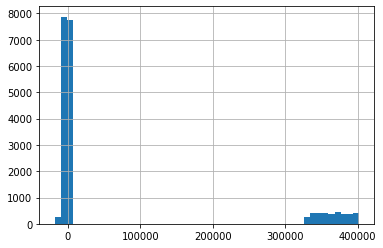

In [18]:
data.days_employed.hist(bins=50);

In [19]:
data[data['days_employed'] > 30000].groupby('income_type').count()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt,total_income,purpose
income_type,,,,,,,,,,,
безработный,2,2,2,2,2,2,2,2,2,2,2
пенсионер,3443,3443,3443,3443,3443,3443,3443,3443,3443,3443,3443


Очевидно, что в данных присутствует некоторое количество аномальных значений, причём большинство из них принадлежит пенсионерам, и две строки безработным.

Отрицательные значения трудового стажа исправим применением "модуля" ко всему столбцу, а аномальные значения заменим медианными по возрасту.

Для этого категоризируем данные по возрасту с помощью метода `apply()`:

In [20]:
def age_category(age):
    '''Функция принимает на вход значение возраста и идентифицирует его категорию'''
    if age <= 20:
        return '< 20'
    if age <= 25:
        return '20-25'
    if age <= 30:
        return '25-30'
    if age <= 35:
        return '30-35'
    if age <= 40:
        return '35-40'
    if age <= 45:
        return '40-45'
    if age <= 50:
        return '45-50'
    if age > 50:
        return '50+'
data['age_category'] = data['dob_years'].apply(age_category)

In [21]:
data['days_employed'] = abs(data['days_employed'])
data.loc[data['days_employed'] > 30000, 'days_employed'] = data.groupby('age_category').transform(lambda x: x.median())

Проверим результат замены:

In [22]:
data[data['days_employed'] > 30000].groupby('income_type').count()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt,total_income,purpose,age_category
income_type,,,,,,,,,,,,
пенсионер,3202,3202,3202,3202,3202,3202,3202,3202,3202,3202,3202,3202


К сожалению, медианное значение у пенсионеров также является некорректным, поэтому заменим все аномальные значения у пенсионеров средним значением трудового стажа при выходе на пенсию в РФ (данные из открытых источников):

In [23]:
avg_retirement = 34.5 * 365
data.loc[data['days_employed'] > 30000, 'days_employed'] = avg_retirement

Удостоверимся, что все аномальные значения заменены:

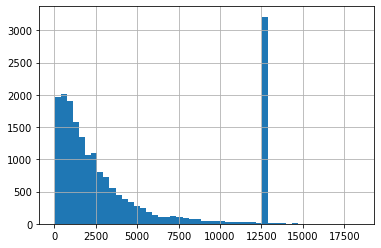

In [24]:
data.days_employed.hist(bins=50);

Все аномальные значения в столбце days_employed устранены. Видно, что замена значений более чем 3000 пенсионеров сильно повлияла на распределение, однако эти данные не представляют интереса при ответе на поставленные вопросы, поэтому в контексте поставленной задачи можно считать, что данные обработаны корректно.

Убедимся, что все пропущенные данные устранены:

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
age_category        21525 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB
None


Все пропуски устранены.

Природа пропущенных данных не всегда однозначно идентифицируется. Это могут быть технические проблемы (такие как, потеря данных при передаче, ошибки в выгрузке, сбои на серверах во время заполнения и т. д.), а может иметь место человеческий фактор (например, человек намеренно не указывает стаж или доход, или указывает в неверном формате, который не может интерпретировать система при обработке данных).

Теперь необходимо устранить аномальные значения.
Природа аномальных значений схожа с природой появления пропусков. Может иметь место как технический, так и человеческий фактор.

Устраним аномальные значения в столбце children:

In [26]:
display(data[data['children'] == -1].head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
291,-1,4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование,45-50
705,-1,902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля,45-50
742,-1,3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование,50+
800,-1,12592.500000,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование,50+
941,-1,NaN,57,Среднее,1,женат / замужем,0,F,пенсионер,0,118514.486412,на покупку своего автомобиля,50+


Прямой зависимости между отрицательным значением количества детей с каким-либо другим столбцом не наблюдается, поэтому заменим данную аномалию медианным значением количества детей по всей таблице. Дополнительно применим функцию `int()` для того, чтобы избавиться от вещественных значений там, где данные должны быть целочисленными.

In [27]:
#int() применена, чтобы отсутствовали вещественные значения
data.loc[data['children'] == -1, 'children'] = int(data['children'].median()) 
print('Количество строк с children = -1: ', len(data[data['children'] == -1]))

Количество строк с children = -1:  0


Аномальные значения в столбце children устранены.

Устраним аномальные значения в столбце dob_years:

In [28]:
display(data[data['dob_years'] == 0].head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
99,0,1019.354207,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль,< 20
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем,< 20
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью,< 20
578,0,1019.354207,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости,< 20
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль,< 20


Прямой зависимости между нулевым значением возраста и другими столбцами не установлено, поэтому заменим данную аномалию медианным значением возраста клиентов. Функция `int()` так же дополнительно применяется для устранения возможного появления вещественного числа.

In [29]:
data.loc[data['dob_years'] == 0, 'dob_years'] = int(data['dob_years'].median()) 
print('Количество строк с dob_years = 0: ', len(data[data['dob_years'] == -1]))

Количество строк с dob_years = 0:  0


Аномальные значения в столбце dob_years устранены.

После устранения всех пропусков и аномальных значений необходимо провести обзор данных повторно:

In [30]:
display(data.head(10))
print(data.info())
display(data.describe())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,40-45
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,35-40
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,30-35
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,30-35
4,0,12592.500000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50+
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,25-30
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,40-45
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,45-50
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,30-35
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,40-45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
age_category        21525 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB
None


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.541092,4044.229967,43.490453,0.817236,0.972544,0.080883,1.652253e+05
std,1.379943,4342.452628,12.218595,0.548138,1.420324,0.272661,9.804367e+04
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,926.925347,34.000000,1.000000,0.000000,0.000000,1.077982e+05
50%,0.000000,2148.412451,42.000000,1.000000,0.000000,0.000000,1.425944e+05
75%,1.000000,5168.663017,53.000000,1.000000,1.000000,0.000000,1.955499e+05
max,20.000000,18388.949901,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Все пропуски и аномальные значения устранены.

**Вывод**

В ходе первого этапа предобработки данных были выявлены пропуски и аномальные значения в данных. Данные отклонения были устранены, а значит, увеличится точность дальнейшего исследования.

### Замена типа данных

Далее необходимо скорректировать типы данных в столбце days_employed. Данное преобразование не является строго обязательным, однако оно приводит значения столбца к целочисленным значениям, которыми они и являются по своей сути. Воспользуемся методом `astype()` для преобразования типов данных. Для предотвращения возможной ошибки воспользуемся конструкцией `try-except`.

In [31]:
#конструкция try-except позволяет избежать прерывание выполнения кода в случае возникновения ошибки
try:
    data['days_employed'] = data['days_employed'].astype('int')
except:
    print('Произошла ошибка при преобразовании типов данных. Тип данных остался без изменений.')

Произошла ошибка при преобразовании типов данных. Тип данных остался без изменений.


Также для наглядности результатов огруглим значения столбца total_income до двух знаков после точки. Данное преобразование не является обязательным, однако может представить данные чуть более наглядно (а также, если речь идёт об известных мировых валютах, обычно они имеют точность стоимости 0,01 у.е.). Воспользуемся методом `round()`

In [32]:
data['total_income'] = round(data['total_income'], 2) #округление значений столбца до 2 знаков после запятой

Проверим, как изменился тип данных:

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
age_category        21525 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


**Вывод**

После этапа замены типа данных, все столбцы имеют тип данных, соответствующий их смысловому наполнению. В контексте данного исследования данный этап не являлся обязательным или критично влияющим на результаты.

### Обработка дубликатов

Далее необходимо обработать дубликаты. Для начала избавимся от неявных дубликатов, которые мы обнаружили на этапе обзора данных. Для этого переведем в нижний регистр все значения столбца education. Воспользуемся методом `str.lower()`

In [34]:
data['education'] = data['education'].str.lower() #приведение всех значений столбца к нижнему регистру

Затем необходимо посчитать общее количество явных дубликатов в таблице. Воспользуемся методом `duplicated()` совместно с методом `sum()`

In [35]:
print('Количество явных дубликатов в таблице:', data.duplicated().sum()) #подсчёт количества явных дубликатов

Количество явных дубликатов в таблице: 71


Данные дубликаты необходимо удалить. Для этого подойдет метод `drop_duplicates()` совместно с методом `reset_index()` 

In [36]:
data = data.drop_duplicates().reset_index(drop=True) #удаление дубликатов и сброс индексов

**Вывод**

Из таблицы были удалены явные и неявные дубликаты, что позволяет не учитывать в итоговых расчётах повторяющиеся данные. Хотя в данном случае, дубликатов немного и они составляют менее 1% от всего набора данных, дублирующиеся строки способны исказить итоговый результат исследования.
Природа их появления так же может быть связана как с технической составляющей (например, ошибка на сервере при обработке), так и с человеческим фактором (например, клиент несколько раз отправил заявку, а система это не отработала корректно)

### Лемматизация

В столбце purpose находятся данный о целях получения кредита. Исходя из содержания данного столбца, данные заполнялись клиентами в свободной форме. Поэтому для дальнейшей категоризации необходимо провести лемматизацию ячеек данного столбца и выделить основные цели. Для этого используем средства из библиотеки **pymystem3**

In [37]:
lemmatizer = Mystem() 
words = [] # список, куда будут вноситься все леммы
lemmas = [] #список, куда будут вноситься все леммы для каждой строки столбца purpose
for index in range(len(data)):
    lemma = lemmatizer.lemmatize(data['purpose'][index])
    lemmas.append(lemma)
    for word in lemma:
        words.append(word)

С помощью функции `Counter()` посчитаем леммы и частоту их появления

In [38]:
Counter(words) #подсчёт частоты появления лемм

Counter({'покупка': 5897,
         ' ': 33570,
         'жилье': 4460,
         '\n': 21454,
         'приобретение': 461,
         'автомобиль': 4306,
         'дополнительный': 906,
         'образование': 4013,
         'сыграть': 765,
         'свадьба': 2324,
         'операция': 2604,
         'с': 2918,
         'на': 2222,
         'проведение': 768,
         'для': 1289,
         'семья': 638,
         'недвижимость': 6351,
         'коммерческий': 1311,
         'жилой': 1230,
         'строительство': 1878,
         'собственный': 635,
         'подержать': 478,
         'свой': 2230,
         'со': 627,
         'заниматься': 904,
         'сделка': 941,
         'подержанный': 486,
         'получение': 1314,
         'высокий': 1374,
         'профильный': 436,
         'сдача': 651,
         'ремонт': 607})

**Вывод**

Проведена лемматизация целей кредитования. Полученные данные потребуются для дальнейшей категоризации. Чаще всего клиенты берут кредиты на автомобили, недвижимость, образование и свадьбы.

### Категоризация данных

На основе лемматизации целей кредитования проведем их категоризацию. Для начала выведем отсортированный список всех лемм.

In [39]:
print(sorted(Counter(words))) #вывод всех лемм в отсортированном по алфавиту виду

['\n', ' ', 'автомобиль', 'высокий', 'для', 'дополнительный', 'жилой', 'жилье', 'заниматься', 'коммерческий', 'на', 'недвижимость', 'образование', 'операция', 'подержанный', 'подержать', 'покупка', 'получение', 'приобретение', 'проведение', 'профильный', 'ремонт', 'с', 'свадьба', 'свой', 'сдача', 'сделка', 'семья', 'со', 'собственный', 'строительство', 'сыграть']


Среди лемм из списка однозначно можно выделить следующие леммы: 
* "автомобиль" 
* "жилой", "жильё", "недвижимость"
* "образование"
* "свадьба"

Остальные леммы не могут однозначно идентифицировать категорию, так как, вероятнее всего, в большинстве случаев выступают как дополнительное описание основной цели (например, "*покупка* **недвижимости**"
Реализуем категоризацию целей кредитования с учётом выделенных лемм. Те цели, которые не включают вышеуказанные слова, отнесем к категории "прочие цели".

Для этого создадим функцию `purpose_category`, которая будет идентифицировать категорию по леммам целей кредитования. Далее добавим временный столбец temp в набор данных, в который поместим леммы по каждой цели. Наконец, применим метод `apply()`, в котором вызовем написанную функцию, к столбцу temp, а затем удалим из таблицы временный столбец методом `drop()`


In [40]:
def purpose_category(lemma_list):
    '''Функция принимает на вход список из лемм и идентифицирует категорию цели кредитования'''
    for lemma in lemma_list:
        if lemma == 'автомобиль':
            return 'автомобиль'
        if lemma == 'жилой' or lemma == 'жилье' or lemma == 'недвижимость':
            return 'недвижимость'
        if lemma == 'образование':
            return 'образование'
        if lemma == 'свадьба':
            return 'свадьба'
    return 'прочие цели'
data['temp'] = lemmas #добавление временного столбца
data['purpose_category'] = data['temp'].apply(purpose_category) #категоризация целей кредитования
data = data.drop(columns='temp') #удаление временного столбца

Также необходимо провести категоризацию уровня дохода (столбец total income). Для этого необходимо узнать минимальное, максимальное и медианное значение уровня дохода, для этого будет использован метод, `median()`. Уровень дохода будет разделен на три категории: низкий, средний, высокий. Низким примем доход в промежутке до 1/2 медианного значения. Средним примем доход от 1/2 медианного значения до 3/2 медианного значения. Высоким примем доход выше 3/2 медианного значения.

In [41]:
med_total_income = data['total_income'].median()
def total_income_category(value):
    '''Функция принимает на вход значение уровня дохода и идентифицирует категорию уровня дохода'''
    if value < med_total_income / 2:
        return 'низкий уровень дохода'
    if value < (med_total_income * 3 / 2):
        return 'средний уровень дохода'
    else:
        return 'высокий уровень дохода'
data['income_category'] = data['total_income'].apply(total_income_category) #применение ко всем значениям столбца функции

**Вывод**

Лемматизация позволила категоризировать цели получения кредита. Данная категоризация позволит провести анализ целей и сделать на их основе выводы. В случае отсутствия лемматизации и последующей категоризации, было бы затруднительно установаить цели кредитования в автоматическом режиме. Данный вопрос можно было бы решить посредством ручной обработки, однако это довольно долгий процесс, который позволит добиться чуть более высокой точности, которая, вероятнее всего, существенно бы не улучшила результат исследования. 

## Ответы на вопросы заказчика

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Для ответа на поставленный вопрос здесь и далее будет использовать метод `groupby()` в совокупности с методами `sum()` (количество просрочек), `count()` и `to_frame()`, а также методом `apply()`. 

Также здесь и далее введем дополнительную метрику, равную отношению количества просроченных платежей к общему количеству клиентов в группе. Эту метрику в данном исследовании необходимо отслеживать, так как количество просроченных платежей заведомо будет больше в той группе, где больше количество людей. Значение метрики увеличивается с увеличением количества просроченных платажей в категории. Также дополнительно рассмотрит отклонение данной метрики от вероятности просрочки платежей по всей таблице.

In [42]:
#расчёт количества просроченных платежей и общего количества людей в категории
data_grby_child = data.groupby('children')['debt'].agg(['sum','count']) 
#расчёт дополнительной метрики и умножение ее на 100 для перевода в проценты
data_grby_child['metric'] = data_grby_child['sum'] / data_grby_child['count'] * 100
data_grby_child.set_axis(['Просроченных платежей', 'Людей в категории','Метрика'], axis=1, inplace=True)
data_grby_child['Отклонение от среднего, %'] = data_grby_child['Метрика'].apply(lambda x: x/data.debt.mean() - 100)
data_grby_child

,Просроченных платежей,Людей в категории,Метрика,"Отклонение от среднего, %"
children,,,,
0,1064,14138,7.525817,-7.260840
1,444,4808,9.234609,13.796267
2,194,2052,9.454191,16.502134
3,27,330,8.181818,0.822934
4,4,41,9.756098,20.222468
5,0,9,0.000000,-100.000000
20,8,76,10.526316,29.713716


**Вывод**

При рассмотрении значений метрики, можно заключить, что принципиальных различий в количестве просроченных платажей в каждой категории нет, а также присутствуют категории, о которых нельзя ничего сказать в виду недостаточности данных. Однако если посмотреть на отклонение данной метрики от вероятности просроченного платежа по всей таблице, то можно сделать следующие выводы, тем самым установив, что зависимость количества просроченных платежей от количества детей имеется:
* наименьшее количество просроченных платежей у клиентов, которые не имеют детей
* наибольшее количество просроченных платежей у клиентов, которые ииеют 2 детей.


- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [43]:
data_grby_fam = data.groupby('family_status')['debt'].agg(['sum','count'])  #получение агрегированных данных
data_grby_fam['metric'] = data_grby_fam['sum'] / data_grby_fam['count'] * 100 # введение дополнительной метрики
data_grby_fam.set_axis(['Просроченных платежей', 'Людей в категории','Метрика'], axis=1, inplace=True) # переименование строк
data_grby_fam['Отклонение от среднего, %'] = data_grby_fam['Метрика'].apply(lambda x: x/data.debt.mean() - 100)
data_grby_fam

,Просроченных платежей,Людей в категории,Метрика,"Отклонение от среднего, %"
family_status,,,,
Не женат / не замужем,274,2810,9.750890,20.158292
в разводе,85,1195,7.112971,-12.348263
вдовец / вдова,63,959,6.569343,-19.047280
гражданский брак,388,4151,9.347145,15.183030
женат / замужем,931,12339,7.545182,-7.022209


**Вывод**

Логическое рассуждение относительно ответа на данный вопрос в точности повторяет предыдущее рассуждение. При рассмотрении метрики независимо, ярких различий между значениями метрики нет, однако если смотреть на отклонения, то зависимость устанавливается и можно сделать следующие выводы:
* наименьшее количество просроченных платежей у клиентов, семейное положение которых имеет статус "вдовец/вдова"
* наибольшее количество просроченных платежей у клиентов, семейное положение которых имеет статус "не женат/не замужем" и "гражданский брак"

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [44]:
data_grby_inc = data.groupby('income_category')['debt'].agg(['sum','count']) 
data_grby_inc['metric'] = data_grby_inc['sum'] / data_grby_inc['count'] * 100
data_grby_inc.set_axis(['Просроченных платежей', 'Людей в категории','Метрика'], axis=1, inplace=True)
data_grby_inc['Отклонение от среднего, %'] = data_grby_inc['Метрика'].apply(lambda x: x/data.debt.mean() - 100)
data_grby_inc

,Просроченных платежей,Людей в категории,Метрика,"Отклонение от среднего, %"
income_category,,,,
высокий уровень дохода,304,4320,7.037037,-13.283979
низкий уровень дохода,109,1579,6.903103,-14.934419
средний уровень дохода,1328,15555,8.537448,5.205287


**Вывод**

Логическое рассуждение относительно ответа на данный вопрос в точности повторяет предыдущие рассуждения. При рассмотрении метрики независимо, ярких различий между значениями метрики нет, однако если смотреть на отклонения, то зависимость устанавливается и можно сделать следующие выводы:
* наименьшее количество просроченных платежей у клиентов с высоким и низким уровнем дохода
* наибольшее количество просроченных платежей у клиентов со средним уровнем дохода

- Как разные цели кредита влияют на его возврат в срок?

In [45]:
data_grby_purp = data.groupby('purpose_category')['debt'].agg(['sum','count']) 
data_grby_purp['metric'] = data_grby_purp['sum'] / data_grby_purp['count'] * 100
data_grby_purp.set_axis(['Просроченных платежей', 'Людей в категории','Метрика'], axis=1, inplace=True)
data_grby_purp['Отклонение от среднего, %'] = data_grby_purp['Метрика'].apply(lambda x: x/data.debt.mean() - 100)
data_grby_purp

,Просроченных платежей,Людей в категории,Метрика,"Отклонение от среднего, %"
purpose_category,,,,
автомобиль,403,4306,9.359034,15.329531
недвижимость,782,10811,7.233373,-10.864564
образование,370,4013,9.220035,13.616673
свадьба,186,2324,8.003442,-1.375157


**Вывод**

Логическое рассуждение относительно ответа на данный вопрос в точности повторяет предыдущие рассуждения. При рассмотрении метрики независимо, ярких различий между значениями метрики нет, однако если смотреть на отклонения, то зависимость устанавливается и можно сделать следующие выводы:
* наименьшее количество просроченных платежей у клиентов с целями кредитов на недвижимость и свадьбу
* наибольшее количество просроченных платежей у клиентов с целями кредитов на образование и автомобиль

## Общий вывод

В ходе исследования был проведен общий обзор данных, их предобработка и последующий анализ. 
Были установлены следующие закономерности:

Если решение об изменении алгоритмов кредитного скоринга будет приниматься на основе количества просроченных платежей в каждой категории с учётом количества клиентов в категории, то лучше рассмотреть метрику, которая характеризует отношение количества просрочек к количеству клиентов в категории, а также принять во внимание отклонения значения данной метрики от вероятности просроченного платежа по всей таблице. 

В таком случае можно сделать выводы, что наибольшее количество просроченных платежей у клиентов, которые:

    * имеют 2 детей
    * не женаты/не замужем или находятся в гражданском браке
    * имеют средний уровень дохода
    * берут кредит на автомобиль или образование
    
   А меньше всего просроченных платажей у клиентов, которые:
   
    * не имеют детей
    * являются вдовцом или вдовой
    * имеют низкий уровень дохода
    * берут кредит на недвижимость или свадьбу
   
   Зависимость количества просроченных платежей во всех четырех вопросах установлена.